In [5]:
import cv2

# Open the camera
cap = cv2.VideoCapture(0)

# Capture one frame
ret, frame = cap.read()

# Save the captured image
cv2.imwrite("captured_image.jpg", frame)

# Release the camera
cap.release()

### Mobilenet Model

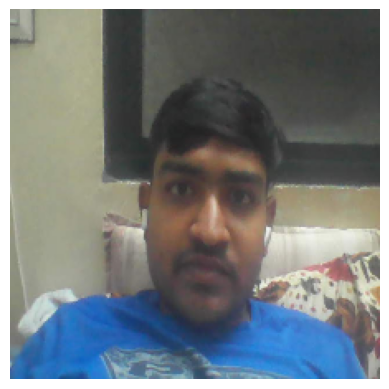

In [8]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Path to the uploaded image
image_path = './captured_image.jpg'

# Load and preprocess the image
image = load_img(image_path, target_size=(224, 224))  # Adjust to match your model's input size
image_array = img_to_array(image)

# Rescale the image (if required by your model)
# image_array = image_array / 255.0

# Add batch dimension (1, height, width, channels)
image_array = np.expand_dims(image_array, axis=0)

# Visualize the image
plt.imshow(image)
plt.axis('off')
plt.show()


In [9]:
# Load the saved model
from tensorflow.keras.models import load_model

# Load the entire model (including weights)
model = load_model('./mobilenet/mobilenet_emotion_model.h5')
model.load_weights('./mobilenet/mobilenet_emotion_model.weights.h5')

# Predict on the preprocessed image
predictions = model.predict(image_array)

# Assuming this is a classification problem, get the predicted class
predicted_class = np.argmax(predictions[0])

# Map the class index to the actual emotion (assuming you know the class labels)
class_labels = ['Angry','Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprice']  # Replace with actual labels
predicted_emotion = class_labels[predicted_class]

print(f"Predicted emotion: {predicted_emotion}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted emotion: Neutral


In [ ]:
# # Load the saved model
# from tensorflow.keras.models import load_model

# # Load the entire model (including weights)
# model = load_model('vgg16_emotion_model.h5')
# model.load_weights('vgg16_emotion_model.weights.h5')

# # Predict on the preprocessed image
# predictions = model.predict(image_array)

# # Assuming this is a classification problem, get the predicted class
# predicted_class = np.argmax(predictions[0])

# # Map the class index to the actual emotion (assuming you know the class labels)
# class_labels = ['Angry','Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprice']  # Replace with actual labels
# predicted_emotion = class_labels[predicted_class]

# print(f"Predicted emotion: {predicted_emotion}")


# Pre trained keggle model

In [14]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the trained model
model_best = load_model('./Pre-trained-model/face_model.h5') # set your machine model file path here

# Classes 7 emotional states
class_names = ['Angry', 'Disgusted', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Load the pre-trained face cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Open a connection to the webcam (0 is usually the default camera)
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Convert the frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

    # Process each detected face
    for (x, y, w, h) in faces:
        # Extract the face region
        face_roi = frame[y:y + h, x:x + w]

        # Resize the face image to the required input size for the model
        face_image = cv2.resize(face_roi, (48, 48))
        face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)
        face_image = image.img_to_array(face_image)
        face_image = np.expand_dims(face_image, axis=0)
        face_image = np.vstack([face_image])

        # Predict emotion using the loaded model
        predictions = model_best.predict(face_image)
        emotion_label = class_names[np.argmax(predictions)]

        # Display the emotion label on the frame
        cv2.putText(frame, f'Emotion: {emotion_label}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
                    0.9, (0, 0, 255), 2)

        # Draw a rectangle around the face
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)

    # Display the resulting frame
    cv2.imshow('Emotion Detection', frame)

    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close the window
cap.release()
cv2.destroyAllWindows()

c:\Users\kevin\.conda\envs\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━

KeyboardInterrupt: 